In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from ultralytics import SAM
from skimage import io
import os

In [2]:
model = SAM("sam2_b.pt")
model.info()

Model summary: 566 layers, 80,833,666 parameters, 80,833,666 gradients


(566, 80833666, 80833666, 0.0)

# Image Definition

In [45]:
IMAGE = "Samples/sample_9.jpg"

In [46]:
test_image = io.imread(IMAGE)
test_image.shape

(640, 640, 3)

In [47]:
# Segment with point prompt (center of image)
results = model(IMAGE, points=[320, 320], labels=[1])


image 1/1 d:\GitHub\Synapxe-Tongue-Project\Data Manipulation\Segmentation\Samples\sample_9.jpg: 1024x1024 1 0, 83.5ms
Speed: 6.0ms preprocess, 83.5ms inference, 0.0ms postprocess per image at shape (1, 3, 1024, 1024)


# Segmentation from Raw Image

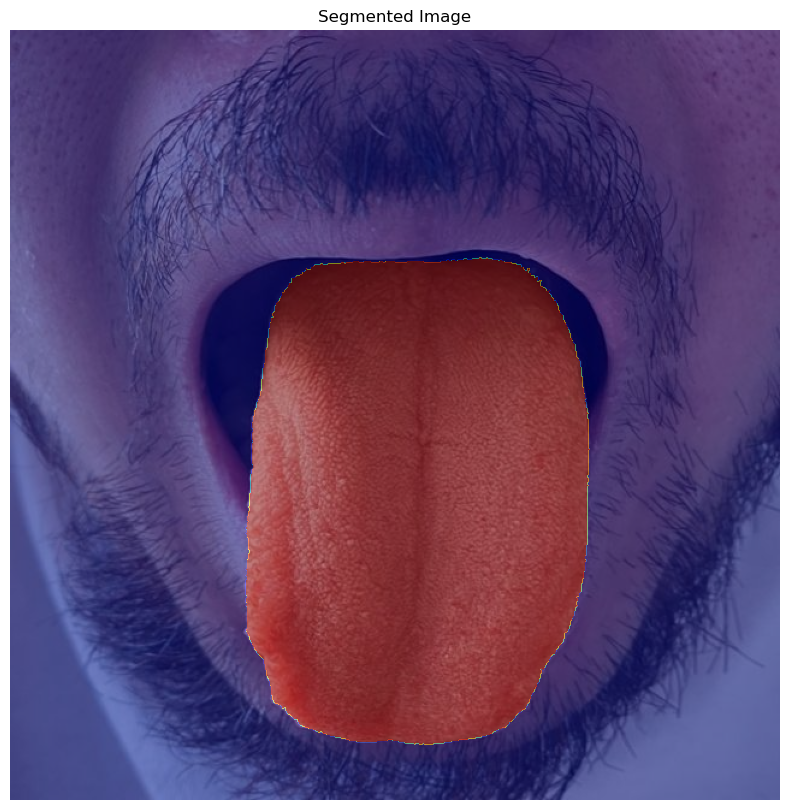

In [6]:
plt.figure(figsize=(10, 10))
plt.imshow(test_image)

# Get the mask from the results
mask = results[0].masks.data[0].cpu().numpy()

# Overlay the mask on the image
plt.imshow(mask, alpha=0.5, cmap='jet')
plt.axis('off')
plt.title('Segmented Image')
plt.show()

# Segmentation from PIL Object


0: 1024x1024 1 0, 208.0ms
Speed: 6.0ms preprocess, 208.0ms inference, 0.0ms postprocess per image at shape (1, 3, 1024, 1024)


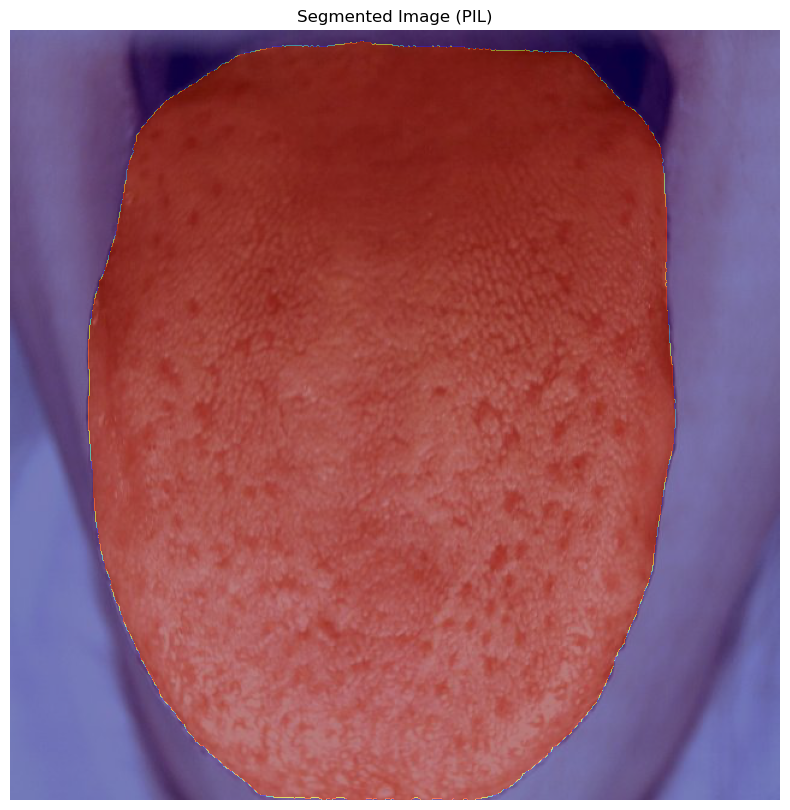

In [48]:
# Using model on PIL.JpegImagePlugin.JpegImageFile object
pil_image = Image.open(IMAGE)

# Convert PIL image to numpy array for visualization
test_image_np = np.array(pil_image)

# Segment with point prompt using the PIL image
results_pil = model(pil_image, points=[320, 320], labels=[1])

# Visualize the results
plt.figure(figsize=(10, 10))
plt.imshow(test_image_np)

# Get the mask from the results
mask_pil = results_pil[0].masks.data[0].cpu().numpy()

# Overlay the mask on the image
plt.imshow(mask_pil, alpha=0.5, cmap='jet')
plt.axis('off')
plt.title('Segmented Image (PIL)')
plt.show()

# Masking

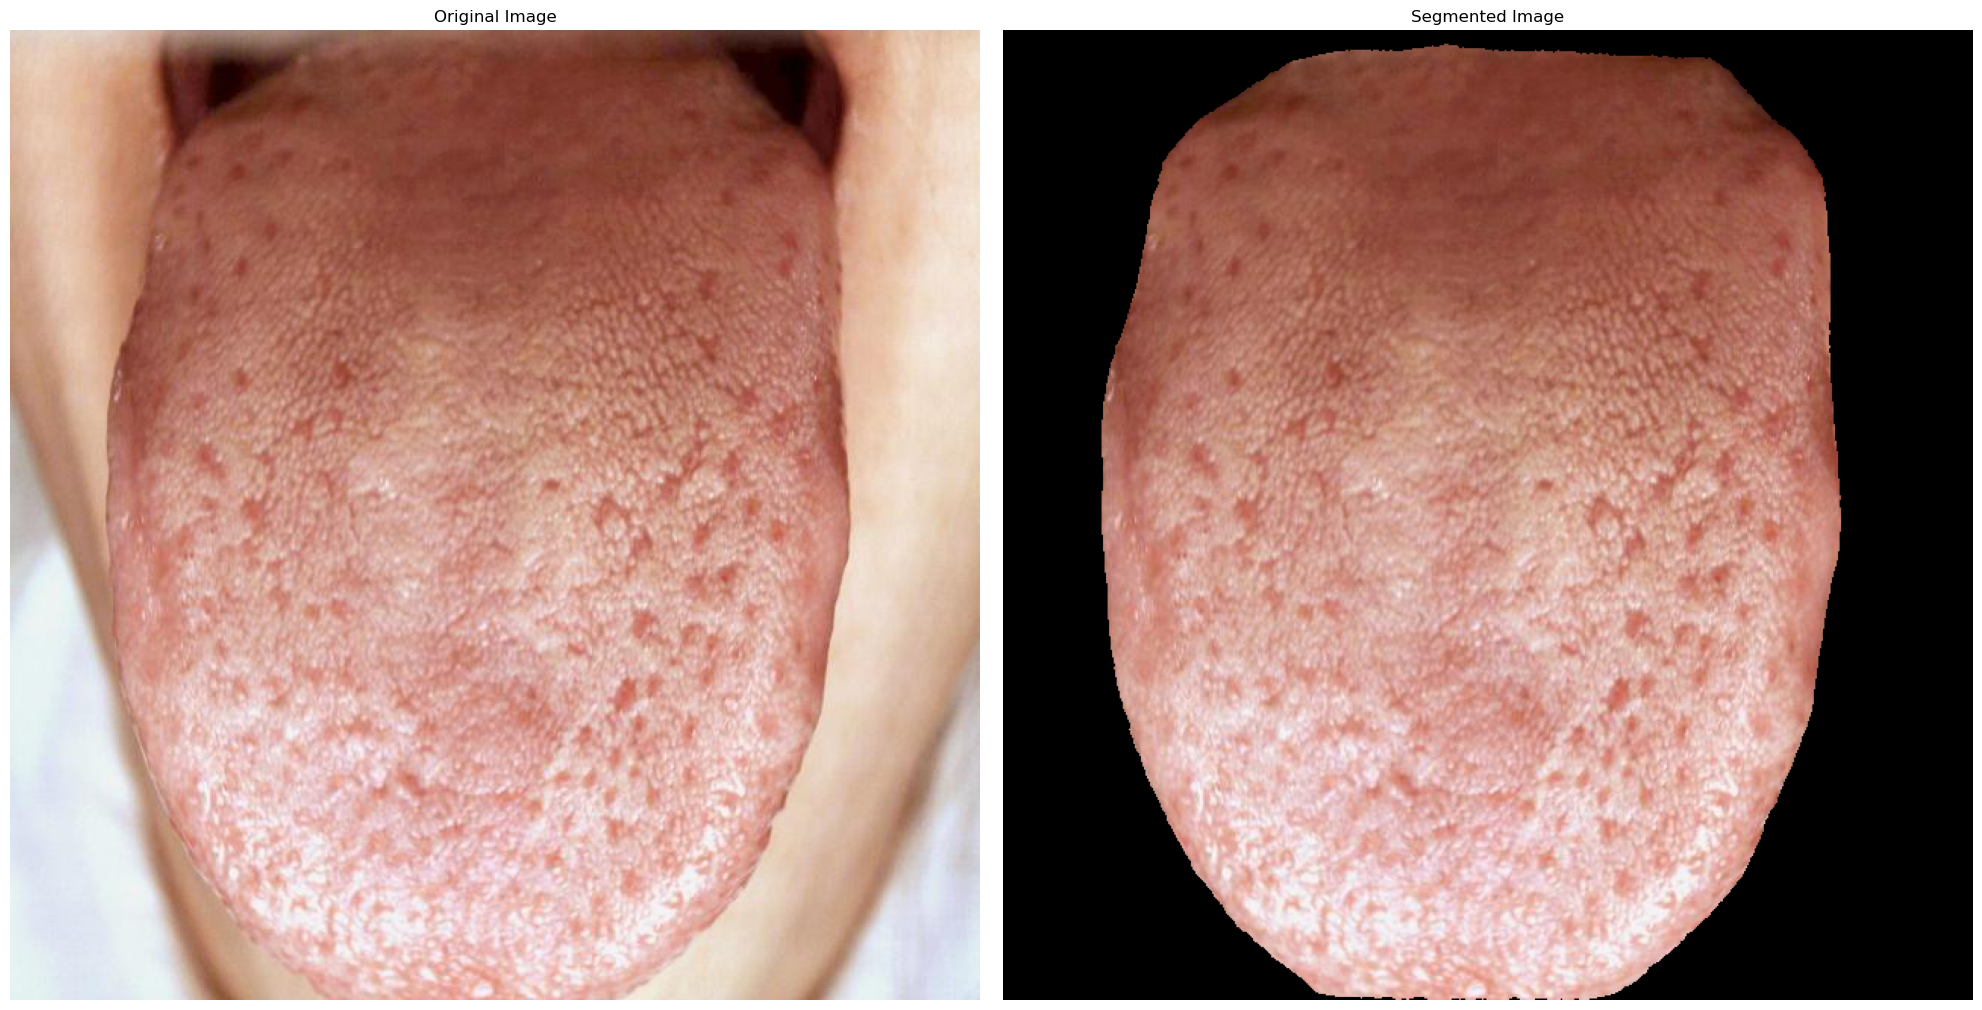

In [49]:
binary_mask = mask_pil > 0.5

rgb_mask = np.repeat(binary_mask[:, :, np.newaxis], 3, axis=2)
segmented_image = test_image_np * rgb_mask

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.imshow(test_image_np)
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(segmented_image)
ax2.set_title('Segmented Image')
ax2.axis('off')

plt.tight_layout()
plt.show()

In [50]:
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

segmented_image_output = Image.fromarray(segmented_image, mode='RGB')
output_path = os.path.join(output_dir, "segmented_" + IMAGE.split("/")[-1])
segmented_image_output.save(output_path)

print(f"Segmented image saved to: {output_path}")

Segmented image saved to: output\segmented_sample_9.jpg
